In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

$$
\frac{x_{n+1} - x_n}{\Delta t} = v_{n+\frac{1}{2}} \\
\frac{v_{n+\frac{3}{2}} - v_{n+ \frac{1}{2}}}{\Delta t} = \frac{-k x_{n+1}}{m} \\ 
x_{n+1} = x_n + \Delta t v_{n+\frac{1}{2}} \\ 
 v_{n+\frac{3}{2}}   = v_{n+\frac{1}{2}} - \Delta t \left(\frac{k x_{n+1}}{m} \right)
$$

In [2]:
def leap_solve(x0, v0, dt, end, k, m, linspace=False):
    '''
    Solves the 1D harmonic oscillator using the leapfrog method
    
    x0: float, initial position
    v0: float > 0, initial speed
    dt: float, timestep, if linspace will use dt total samples
    end: float, time until which the equation is solved (inclusive)
    k: float, spring constant
    m: float, mass of object
    linspace: bool, whether to use a constant timestep or use a constant number of samples
              if True will use dt as the total number of samples
    '''
    x = [x0]
    v = [v0]
    tx = np.arange(0, end+dt, dt)

    if linspace:
        tx = np.linspace(0, end, dt)
        dt = tx[1]
    tv = tx + 0.5*tx[1]
        
    for i in range(len(tx[1:])):
    
        x += [x[i] + dt * v[i]]
        v += [v[i] - dt * (k*x[i] / m)]
    
    return tx, x, tv, v

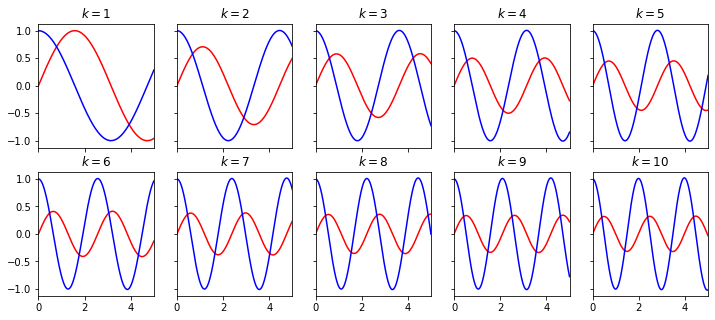

In [3]:
x0 = 0
v0 = 1 
dt = 0.001
end = 5
k = np.arange(1, 11, 1)
m = 1

fig, ax = plt.subplots(2, 5, figsize=(12, 5), sharey=True, sharex=True)

for i in range(len(k)):
    timex, x, timev, v = leap_solve(x0, v0, dt, end, k[i], m)
    ax[i//5, i%5].plot(timex, x, color='red')
    ax[i//5, i%5].plot(timev, v, color='blue')
    ax[i//5, i%5].set_xlim(min(timex), max(timev))
    ax[i//5, i%5].set_title(f'$k={k[i]}$')
    

plt.show()

In [4]:
from scipy.integrate import solve_ivp

def RK45(x0, v0, dt, end, k, m, linspace=False):
    '''
    PDE solver using the Runge-Kutta 45 method
    '''
    tx = np.arange(0, end+dt, dt)

    if linspace:
        tx = np.linspace(0, end, dt)

    def eqs(tx, y, k, m):
        x, v = y
        return v, -k * x / m
    
    y0 = [x0, v0]
    
    return solve_ivp(eqs, (min(tx), max(tx)), y0, t_eval=tx, args=(k, m))
    
sol = RK45(x0, v0, dt, end, k[0], m)


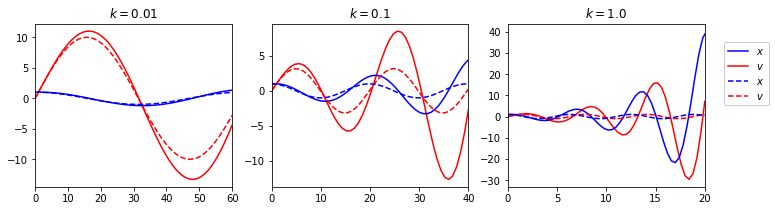

In [5]:
k = np.logspace(-2, 0, 3)
x0 = 0
v0 = 1 
dt = 51
m = 1

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=False)

for i in range(len(k)):
    end = 20 * (len(k) - i)
    
    # leap frog method
    timex, x, timev, v = leap_solve(x0, v0, dt, end, k[i], m, linspace=True)
    ax[i].plot(timex, x, color='red')
    ax[i].plot(timev, v, color='blue')

    
    # RK 45 method
    sol = RK45(x0, v0, dt, end, k[i], m, linspace=True)
    ax[i].plot(sol.t, sol.y[0], 'r--')
    ax[i].plot(sol.t, sol.y[1], 'b--')
    
    ax[i].set_xlim(min(sol.t), max(sol.t))

    ax[i].set_title(f'$k={k[i]}$')
    
custom_lines = [Line2D([0], [0], color='blue', linestyle='-'), Line2D([0], [0], color='red', linestyle='-'), 
               Line2D([0], [0], color='blue', linestyle='--'), Line2D([0], [0], color='red', linestyle='--')]
plt.legend(custom_lines, ['$x$', '$v$', '$x$', '$v$'], loc=(1.1, 0.5), framealpha=1)
       

    
plt.show()

In [6]:
def ext_force(Ft, x0, v0, dt, end, k, m, f=1):
    x = [x0]
    v = [v0]
    tx = np.arange(0, end+dt, dt)
    tv = tx + 0.5*tx[1]
    
    for i in range(len(tx[1:])):
    
        x += [x[i] + dt * v[i]]
        v += [(v[i] + dt/m * (Ft(tx[i], f) - 2*k*x[i]))]
        
    return tx, x, tv, v

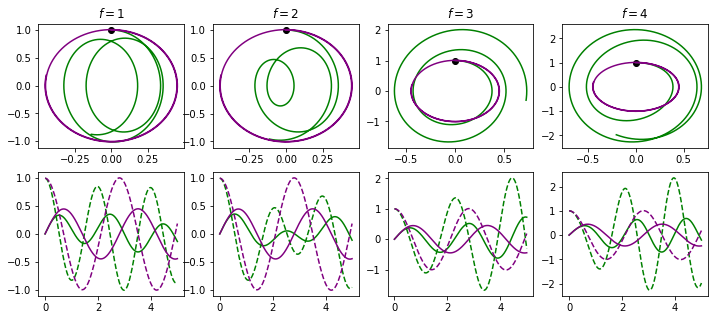

In [11]:
x0 = 0
v0 = 1 
dt = 0.001
end = 5
m = 1
k = 5
f = np.arange(1, 5)
fig, ax = plt.subplots(2, 4, figsize=(12, 5), sharey=False)

for i in f:
    
    # external force
    Ft = lambda t, f: np.sin(f*t)
    tx, x, tv, v = ext_force(Ft, x0, v0, dt, end, k, m, f=i)

    ax[(i-1)//len(f), (i-1)%len(f)].plot(x, v, color='green')
    ax[(i-1)//len(f), (i-1)%len(f)].scatter(x[0], v[0], color='black')
    ax[(i-1)//len(f), (i-1)%len(f)].set_title(f'$f = {i}$')
    
    ax[(i-1+len(f))//len(f), (i-1)%len(f)].plot(tx, x, 'g-')
    ax[(i-1+len(f))//len(f), (i-1)%len(f)].plot(tv, v, 'g--')
    
    # normal
    tx, x, tv, v = leap_solve(x0, v0, dt, end, k, m)
    ax[(i-1)//len(f), (i-1)%len(f)].plot(x, v, color='purple')
    
    ax[(i-1+len(f))//len(f), (i-1)%len(f)].plot(tx, x, color='purple')
    ax[(i-1+len(f))//len(f), (i-1)%len(f)].plot(tv, v, '--', color='purple')
    
plt.show()

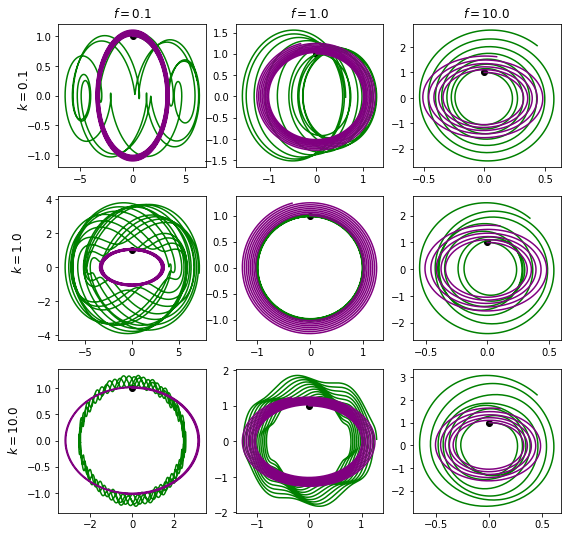

In [18]:
x0 = 0
v0 = 1 
dt = 0.01
m = 1
k = np.logspace(-1, 1, 3)
f = np.logspace(-1, 1, 3)
Ft = lambda t, f: np.sin(f*t)
end_n = 10

fig, ax = plt.subplots(3, 3, figsize=(9, 9), sharey=False, sharex=False)

for i in range(len(f)):
    for j in range(len(k)):
        
        if j == 2: end = 10
        elif j == 1: end = 50
        elif j == 0:
            end = 50
            if i != 2:
                end = 200
        
        # external force
        tx, xe, tv, ve = ext_force(Ft, x0, v0, dt, end, k[j], m, f=f[i])

        ax[i, j].plot(xe, ve, color='green')
        ax[i, j].scatter(xe[0], ve[0], color='black')
    
        # normal
        tx, xn, tv, vn = leap_solve(x0, v0, dt, end, k[j], m)
        ax[i, j].plot(xn, vn, color='purple')
#         ax[i, j].axis('off')
#         ax[i, j].set_xlim(min(xn+xe), max(xn+xe))
#         ax[i, j].set_ylim(min(vn+ve), max(vn+ve))

        if i == 0:
            ax[i, j].set_title(f'$f={f[j]}$')
        if j == 0:
            x = -13
            if i == 0: x += 2
            elif i == 2: x += 7
            ax[i, j].text(x, -0.2, f'$k={k[i]}$', rotation=90, fontsize='large')


# plt.subplots_adjust(hspace=0, wspace=0)    
plt.show()